# Sentiment analysis of academic subreddit's submissions

In [1]:
import pandas as pd
from textblob import TextBlob
import sys
sys.path.append("../src/")


posts = pd.read_pickle("../data/interim/clean_posts.pkl")
selftext = posts[["id", "subreddit", "selftext", "selftext_clean", "title", "title_clean"]]

#Filter everything that is not string:
selftext = selftext[selftext["selftext"].apply(lambda x: isinstance(x, str))]

## Get submission polarity using `textblob`

`textblob` is a NLP library that provides a simple API to perform common text processing operations such as tokenization, part-of-speech tagging, and sentiment analysis. `TextBlob` objects are the main data type from the package, and have many properties that correspond to the common text pre-processing operations. 

The `sentiment` property of `TextBlob` objects returns a named tupple `Sentiment(polarity, subjectivity)`. Polarity score is a float ranging from -1 (most negative) and 1 (most positivie), and corresponds to the sentiment of the text. 

Let's get the sentiment of a random sample of our `selftext` dataset:

In [12]:
sample = selftext["selftext"].sample(1).iloc[0]
print(sample)

I saw some little microscops like hats on mice and some cables or little tubes going to heads of animals. do these stuff hurt them. how do they attach them to the animals? is that how imaging done or are there any others ways? anyone have any information about research done in mice, songbirds, zebrafish or fruit flies? I am thinking of studying ns as UG so really want to know about the research and lab circumstances. and I find animal research a bit depressing. I thought imaging was non-invasive. I know animal research is necessary but I wouldn't want to do it myself. are there any other options?


In [13]:
TextBlob(sample).sentiment

Sentiment(polarity=-0.15, subjectivity=0.5791666666666667)

In [5]:
%%time

#return polarity score for strings
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

selftext["polarity"] = selftext["selftext"].apply(get_sentiment)
display(selftext.head())



,id,subreddit,selftext,selftext_clean,title,title_clean,polarity
1,eresb0,AskAcademia,Im an undergraduate junior doing work in a bio...,im an undergraduate junior doing work in a bio...,Should I switch labs (undergrad),should i switch labs undergrad,0.112500
2,ereqjn,AskAcademia,I am currently an associate scientist in a mic...,i am currently an associate scientist in a mic...,Would I benefit from getting my masters degree...,would i benefit from getting my masters degree...,0.044671
3,erecwn,AskAcademia,I get extremely anxious about submitting and I...,i get extremely anxious about submitting and i...,When to contact editors about a mistake with a...,when to contact editors about a mistake with a...,0.004167
4,erbndq,AskAcademia,"Hello fellow redditors,\n\nI have scourged th...",hello fellow redditors\ni have scourged the cl...,fully licensed doctor but want to get into the...,fully licensed doctor but want to get into the...,0.117842
5,er9ylp,AskAcademia,This thread is posted weekly to provide short ...,this thread is posted weekly to provide short ...,"[Weekly] Office Hours - undergrads, please ask...",weekly office hours undergrads please ask your...,0.218750


CPU times: user 1min 22s, sys: 250 ms, total: 1min 22s
Wall time: 1min 24s


## Distribution of polarity scores



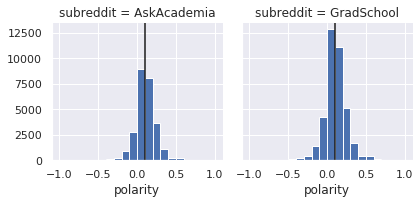

In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()
g = sns.FacetGrid(selftext, col="subreddit", margin_titles=True)
g.map(plt.hist, "polarity", bins = 20)

def mean_line(x, **kwargs):
    plt.axvline(x.mean(), color = 'k')

g.map(mean_line, "polarity")

Surprisingly, the distributions for the two subreddits are very similar and the mean polarity score is slightly positive:

In [30]:
selftext.groupby("subreddit").describe()


polarity                                                        \
               count      mean       std  min       25%      50%       75%   
subreddit                                                                    
AskAcademia  26298.0  0.107046  0.140551 -1.0  0.022988  0.10285  0.181818   
GradSchool   38244.0  0.105594  0.151027 -1.0  0.017024  0.10000  0.182955   

                  
             max  
subreddit         
AskAcademia  1.0  
GradSchool   1.0